In [44]:
# formatowanie dat
import matplotlib.dates as mdates
# rysowanie wykresów
import matplotlib.pyplot as plt
# rysowanie wykresów (głównie statystyka)
import seaborn as sns
# kolumnowo wierszowe struktury danych
import pandas as pd


In [45]:
# wczytywanie danych
data = sns.load_dataset('flights')


In [46]:
# przegląd części (poznanie struktury) danych
data.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [47]:
# informacje na temat typów danych
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [48]:
# podstawowe statystyki dla danych
data.describe()


,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<AxesSubplot:xlabel='year', ylabel='passengers'>

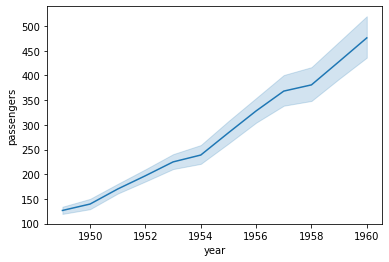

In [49]:
# wykres danych (domyślny)
sns.lineplot(x='year', y='passengers', data=data)


<AxesSubplot:>

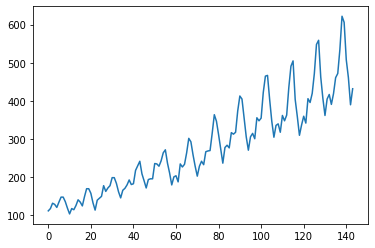

In [50]:
# wykres wszystkich danych (do poprawy oś x - daty)
sns.lineplot(x=data.index.values, y=data.passengers.values)


In [51]:
# stworzenie kolumny z datą z 2 osobnych kolumn
data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))


In [52]:
# przegląd części zmienionych danych
data.head()


,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [53]:
# przerzucenie daty jako index, usunięcie zbędnych kolumn
del data['year']
del data['month']

data.set_index('date', inplace=True)


In [54]:
# przegląd ostatecznej struktury danych
data.head()


,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='date'>

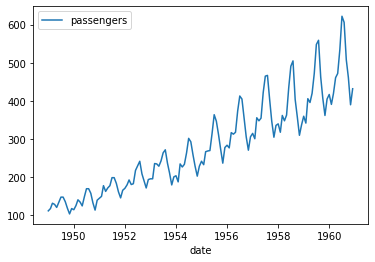

In [55]:
# wykres wszystkich danych (do poprawy: bardziej szczegółowa reprezentacja dat)
sns.lineplot(data=data)


Text(0, 0.5, 'Number of passengers')

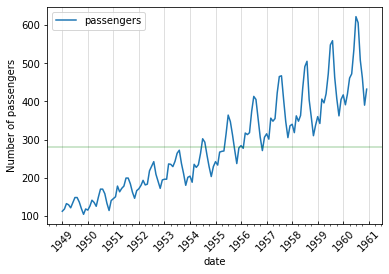

In [56]:
# wykres wszystkich danych (szczegółowe przedziały dat)
fig, ax = plt.subplots()

sns.lineplot(data=data, ax=ax)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))

ax.tick_params(axis='x', rotation=45, direction='in', grid_alpha=0.5)
ax.grid(axis='x')

ax.axhline(data['passengers'].values.mean(), color='green', linewidth=0.4)
ax.set_ylabel('Number of passengers')
